In [3]:
%matplotlib inline
from imgcube.cube import imagecube
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('paper')

In [4]:
# Define a nicer colormap.
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
c2 = plt.cm.Reds(np.linspace(0, 1, 32))
c1 = plt.cm.Blues_r(np.linspace(0, 1, 32))
c1 = np.vstack([c1, [1, 1, 1, 1]])
colors = np.vstack((c1, c2))
cmap = mcolors.LinearSegmentedColormap.from_list('eddymap', colors)

In [39]:
# Load up the data.
quadratic = imagecube('../data/line/TWHya.12CO_v0.fits', clip=4.0)
first = imagecube('../data/line/TWHya.12CO_M1.fits', clip=4.0)

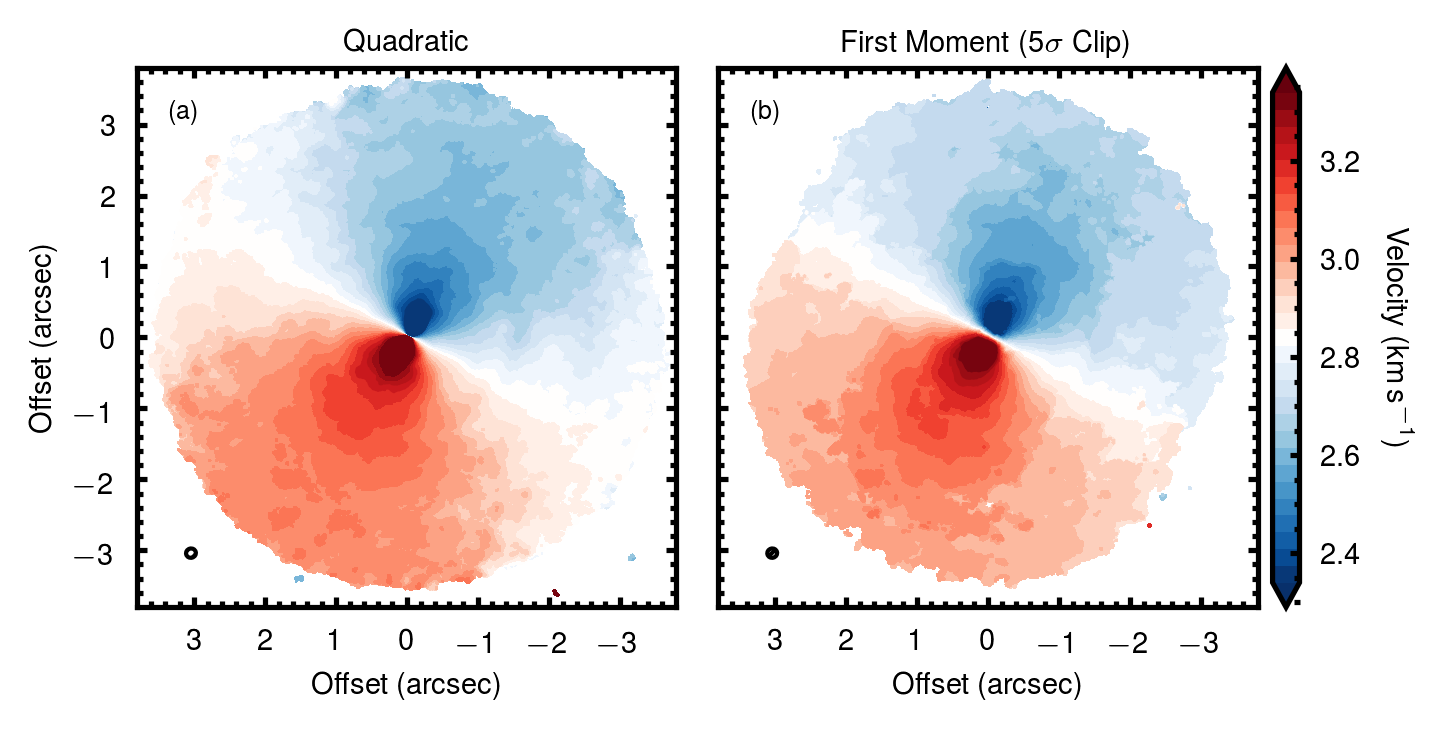

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(5, 2.5))
plt.subplots_adjust(wspace=0.0)

# Quadratic moment.
for ax, cube in zip(axs, [quadratic, first]):

    vlsr, dV = 2.84, 0.5
    toplot = cube.data * 1e-3
    inner = np.hypot(cube.xaxis[None, :], cube.yaxis[:, None]) <= 2.0
    toplot = np.where(np.logical_and(inner, toplot < vlsr - dV), vlsr - 0.99*dV, toplot)
    toplot = np.where(np.logical_and(inner, toplot > vlsr + dV), vlsr + 0.99*dV, toplot)
    toplot = np.where(abs(toplot - vlsr) < dV, toplot, np.nan)
    
    im = ax.contourf(cube.xaxis, cube.yaxis, toplot, levels=np.linspace(vlsr-dV, vlsr+dV, 30),
                     cmap=cmap, extend='both')
    for cs in im.collections:
        cs.set_edgecolor('face')
        cs.set_linewidth(0.5)
    cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.05)
    
    # Make the colorbar.
    if ax == axs[-1]:
        cb = fig.colorbar(im, cax=cax, orientation='vertical', ticks=np.arange(2, 5, 0.2))
        cb.set_label('Velocity (km\,s$^{-1}$)', rotation=270, labelpad=13)
    else:
        cax.axis('off')

    ax.set_aspect(1)
    
    R = 3.8
    ax.set_xlim(R, -R)
    ax.set_ylim(-R, R)
    ax.tick_params(which='both', right=1, top=1)
    ax.set_xlabel('Offset (arcsec)')
    cube.plotbeam(ax=ax, x0=0.1, y0=0.1)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.yaxis.set_major_locator(MultipleLocator(1.0))
    
axs[1].set_yticklabels([])
axs[0].set_ylabel('Offset (arcsec)')
axs[0].text(0.5, 1.02, 'Quadratic', va='bottom', ha='center', fontsize=7, transform=axs[0].transAxes)
axs[1].text(0.5, 1.02, 'First Moment (5$\sigma$ Clip)', va='bottom', ha='center', fontsize=7,
            transform=axs[1].transAxes)
axs[0].text(0.06, 0.94, '(a)', ha='left', va='top', transform=axs[0].transAxes, fontsize=6)
axs[1].text(0.06, 0.94, '(b)', ha='left', va='top', transform=axs[1].transAxes, fontsize=6)
plt.savefig('rotation_maps.pdf', bbox_inches='tight')